# Visualize Feature Vectors

In [1]:
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import random

from utils.search_utils import Search, CombinedSearch, AkiwiFeatureGenerator, ResnetFeatureGenerator
from utils import image_utils

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load data

In [2]:
folder_gens = {'akiwi_50': AkiwiFeatureGenerator(50), 
               'akiwi_64': AkiwiFeatureGenerator(64),
               'akiwi_114': AkiwiFeatureGenerator(114),
               'resnet': ResnetFeatureGenerator(),
               'resnet_retrained': ResnetFeatureGenerator('./models/resnet152_retrained.pth')
              }

In [3]:
product_imgs = '../../data/fashion/dresses/'
product_feats_root = './data/features/fashion/dresses/'

In [4]:
searches = {}
for dir_name, gen in folder_gens.items():
    searches[dir_name] = Search(product_imgs, os.path.join(product_feats_root, dir_name), gen)

Loading features from: ./data/features/fashion/dresses/akiwi_50
Loading features from: ./data/features/fashion/dresses/akiwi_64
Loading features from: ./data/features/fashion/dresses/akiwi_114
Loading features from: ./data/features/fashion/dresses/resnet
Loading features from: ./data/features/fashion/dresses/resnet_retrained


# Plot Features

In [5]:
def plot_features(img, feat_gen, num_repeat=1000):
    
    fig1, ax1 = plt.subplots(figsize=(10, 10))
    
    feat = feat_gen.get_feature(Image.open(img))
    feat = feat.reshape(-1, 1)
    feat = feat.repeat(num_repeat, axis=1)

    ax1.imshow(feat, cmap='gray')
    ax1.axis('off')
        
    plt.show()       

In [6]:
def plot_features_diff(imgs, feat_gen, num_repeat=1000):
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        
    feats = []
    
    for idx, img in enumerate(imgs):
        feat = feat_gen.get_feature(Image.open(img))
        feat = feat.reshape(1, -1)
        feat = feat.repeat(num_repeat, axis=0)
        
        feats.append(feat)
    
    feat_diff = np.abs(feats[0] - feats[1])
    ax.imshow(feat_diff, cmap='gray')
    ax.axis('off')
        
    plt.show()       

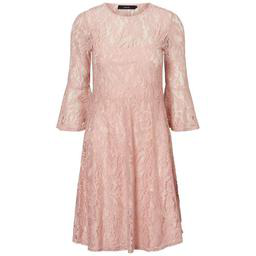

In [7]:
# get all images sorted by similarity towards img_path
img_path = '../../data/fashion/dresses/5713733606269.jpg'
imgs, dist = searches['akiwi_50'].get_similar_images(Image.open(img_path), 16000)
Image.open(img_path)

In [8]:
test_imgs = []
test_imgs.append(img_path)

Smallest distance image 2.1272834713
../../data/fashion/dresses/BOH0213001000004.jpg


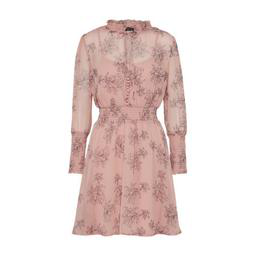

In [9]:
print('Smallest distance image', dist[1])
print(imgs[1])
test_imgs.append(imgs[1])
Image.open(imgs[1])

Biggest distance image 20.4950586895
../../data/fashion/dresses/182001910272034.jpg


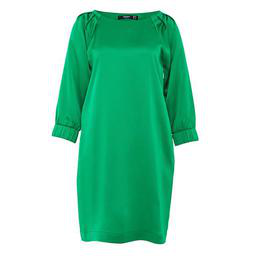

In [10]:
print('Biggest distance image', dist[-1])
print(imgs[-1])
test_imgs.append(imgs[-1])
Image.open(imgs[-1])

In [11]:
imgs, dist = searches['akiwi_50'].get_similar_images(Image.open(test_imgs[-1]), 3)

Smallest distance image 3.02330813628
../../data/fashion/dresses/5713736660602.jpg


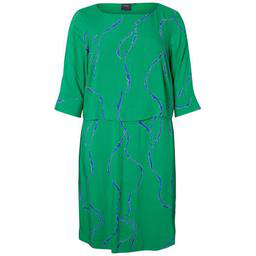

In [12]:
print('Smallest distance image', dist[1])
print(imgs[1])
test_imgs.append(imgs[1])
Image.open(imgs[1])

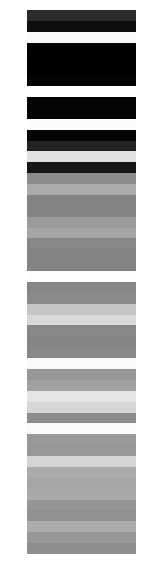

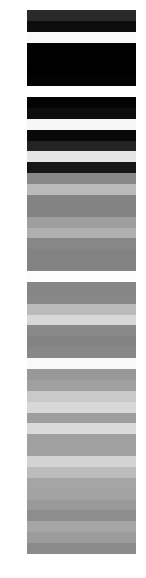

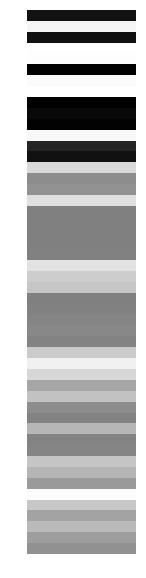

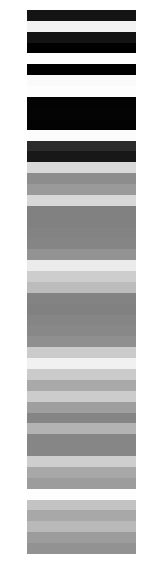

In [13]:
for test_img in test_imgs:
    plot_features(test_img, folder_gens['akiwi_50'], num_repeat=10)